<a href="https://colab.research.google.com/github/BlueveryPi/image_2_txt_now_with_video/blob/main/new_txt_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import *
import numpy as np
from urllib.request import urlopen
from google.colab import files

batch=2
#lst=[" ", ".", ":", "-", "=", "+", "*", "#", "%", "@"]
lst=["□","▒" ,"▧" ,"▥" ,"▦" ,"▩" ,"▣" ,"■"]

lst.reverse()
url=str(input("URL: "))
image=Image.open(urlopen(url))
image=image.resize([image.size[0]//batch*batch, image.size[1]//batch*batch])
image=image.convert("L")
img_array=np.array(image)
txt=""

for y in range(int(image.size[1]/batch)):
    y*=batch
    for x in range(int(image.size[0]/batch)):
        x*=batch
        ave=0
        a=0
        b=0
        for i in range(batch*batch):
            a=(i%batch)+x-1
            b=(i//batch)+y
            ave+=img_array[b][a]
        txt+=str(lst[int((((ave/(batch*batch))/255)*(len(lst)-1)))])
    txt+="\n"
f=open('data.txt', 'w+')
f.write(txt)
files.download('data.txt')

URL: https://blog.kakaocdn.net/dn/0bPpn/btqyG7d2qRt/WMbqthXCUqsHr2MGAvEJk1/img.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

URL: https://play-lh.googleusercontent.com/Jfi1sAHOOijxYrtXxfZp0b7hrHh7qh_PJ6NfELApffcoI7fJ30LgPn7cWTR9txbEUGmZ


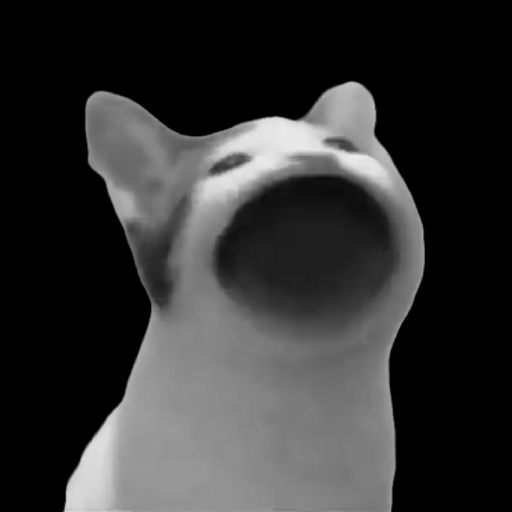

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from PIL import Image
import numpy as np
from urllib.request import urlopen
from google.colab import files
from google.colab.patches import cv2_imshow

lst=["□","▒" ,"▥" ,"▦" ,"▩" ,"▣" ,"■"]

url=str(input("URL: "))
image=Image.open(urlopen(url))
image=image.resize([image.size[0]//batch*batch, image.size[1]//batch*batch])
image=image.convert("L")
img_array=np.array(image)
txt=""

cv2_imshow(img_array)

for y in range(image.size[1]):
    for x in range(image.size[0]):
        txt+=lst[int((img_array[y][x]/255)*len(lst))-1]
    txt+="\n"

f=open('data.txt', 'w+')
f.write(txt)
files.download('data.txt')

In [ ]:
from google.colab import files
#f=files.upload()

AttributeError: ignored

In [ ]:
drive.mount('/content/drive')

In [106]:
from PIL import Image
import numpy as np
from google.colab import files
from google.colab import drive
import cv2
from pathlib import Path
import os


lst=["  ", "□","▒" ,"▥" ,"▨", "▦" ,"▩" ,"▣" ,"◙◙", "■"]
mainlst=[]
vid=files.upload()
vid=open("/content/"+list(vid.keys())[0])
#/content/testvid.mp4
rgb_weights=[0.2989, 0.5870, 0.1140]

resx=50
resy=50
invert=0

def drive(f):
    p = Path("/content/"+os.path.basename(f.name)+"/")
    f.save(p)

#drive(vid)
vidcap = cv2.VideoCapture(os.path.basename(vid.name))
success,image = vidcap.read()
i=0
total=int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
while success:
    i+=1
    txt=""
    success,image = vidcap.read()
    if str(type(image))=="<class 'NoneType'>":
        break
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, dsize=(int(len(image[0])/resx), int(len(image)/resy)), interpolation=cv2.INTER_CUBIC)
    for y in range(len(image)):
        for x in range(len(image[0])):
            txt+=lst[invert*(len(lst))+((-1)**invert)*(round((image[y][x]/255)*len(lst)))-1]
        txt+="\n"
    mainlst.append(txt)
    if ((i/total)*100)%10==0:
        print(str((i/total)*100)+"%")

print("100.0%")
os.remove(os.path.basename(vid.name))

Saving testvid.mp4 to testvid.mp4
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


In [102]:
print((-1)**0)

1


오 이런 밋힌 굴러간다                          
이건 전설이야                                      쩌러!

In [109]:
from IPython.display import clear_output
import time

fps=30


for t in mainlst:
    start=time.time()
    clear_output(wait=True)
    print(t)

    time.sleep(fps/1000)
    

clear_output()
print("감사합니다 :)")

감사합니다 :)


In [ ]:
print(mainlst[0]==mainlst[1])

[[[193 210 235]
  [193 210 235]
  [193 210 235]
  ...
  [176 198 222]
  [176 198 222]
  [176 198 222]]

 [[193 210 235]
  [193 210 235]
  [193 210 235]
  ...
  [176 198 222]
  [176 198 222]
  [176 198 222]]

 [[193 210 235]
  [193 210 235]
  [193 210 235]
  ...
  [176 198 222]
  [176 198 222]
  [176 198 222]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
